## Desafio EDA - Módulo 4

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df_netflix = pd.read_csv(
    filepath_or_buffer="../datasets/netflix_daily_top10.csv",  encoding='utf-8')
df_netflix.head(n=10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
5,2020-04-01,6,6,-,Car Masters: Rust to Riches,TV Show,Yes,"Sep 14, 2018",4,14
6,2020-04-01,7,10,-,Unorthodox,TV Show,Yes,"Mar 26, 2020",2,5
7,2020-04-01,8,7,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",9,40
8,2020-04-01,9,8,-,Badland,Movie,NaN,"Mar 26, 2020",4,11
9,2020-04-01,10,9,-,Uncorked,Movie,Yes,"Mar 27, 2020",4,15


In [25]:
# dataset shape
print(f'Quantidade de Linhas: {df_netflix.shape[0]}\nQuantidade de Colunas: {df_netflix.shape[1]}') 

Quantidade de Linhas: 7100
Quantidade de Colunas: 10


In [26]:
# show full dataframe and its size
display(df_netflix)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


In [27]:
# Convert column 'As of' to datetime
df_netflix['As of'] = pd.to_datetime(arg=df_netflix['As of'])

# analysis period
init_period = df_netflix["As of"].min().strftime('%d-%m-%Y')
end_period = df_netflix["As of"].max().strftime('%d-%m-%Y')

# show result
print(f'Analysis period: {init_period} to {end_period}')

Analysis period: 01-04-2020 to 11-03-2022


In [28]:
df_netflix.tail(n=3)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33
7099,2022-03-11,10,10,-,Shrek,Movie,NaN,"May 1, 2018",7,12


In [29]:
# verify null values and data type
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   As of                 7100 non-null   datetime64[ns]
 1   Rank                  7100 non-null   int64         
 2   Year to Date Rank     7100 non-null   object        
 3   Last Week Rank        7100 non-null   object        
 4   Title                 7100 non-null   object        
 5   Type                  7100 non-null   object        
 6   Netflix Exclusive     4599 non-null   object        
 7   Netflix Release Date  7100 non-null   object        
 8   Days In Top 10        7100 non-null   int64         
 9   Viewership Score      7100 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 554.8+ KB


In [30]:
# list null values
df_netflix.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [31]:
# show resume of descriptive statistics (numerical features)
df_netflix.describe(include="int64")

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


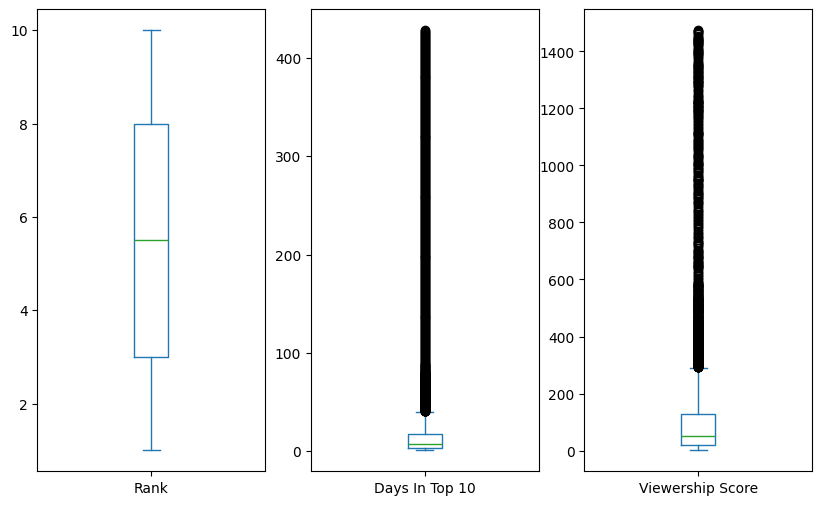

In [32]:
# boxplot for numerical features
df_netflix.plot(kind='box', figsize=(10,6),subplots=True); 

In [33]:
# list outliers for "days in top 10"
df_netflix[df_netflix['Days In Top 10'] >= 100]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
2886,2021-01-14,7,6,8,Cocomelon,TV Show,NaN,"Jun 1, 2020",100,287
2896,2021-01-15,7,7,10,Cocomelon,TV Show,NaN,"Jun 1, 2020",101,291
2909,2021-01-16,10,7,9,Cocomelon,TV Show,NaN,"Jun 1, 2020",102,292
2919,2021-01-17,10,10,9,Cocomelon,TV Show,NaN,"Jun 1, 2020",103,293
3019,2021-01-27,10,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",104,294
...,...,...,...,...,...,...,...,...,...,...
6674,2022-01-28,5,6,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",424,1466
6687,2022-01-29,8,5,8,Cocomelon,TV Show,NaN,"Jun 1, 2020",425,1469
6718,2022-02-01,9,-,7,Cocomelon,TV Show,NaN,"Jun 1, 2020",426,1471
6959,2022-02-25,10,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",427,1472


c:\Users\Usuário\.virtualenvs\statistics_devs-AsY5--ea\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Usuário\.virtualenvs\statistics_devs-AsY5--ea\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


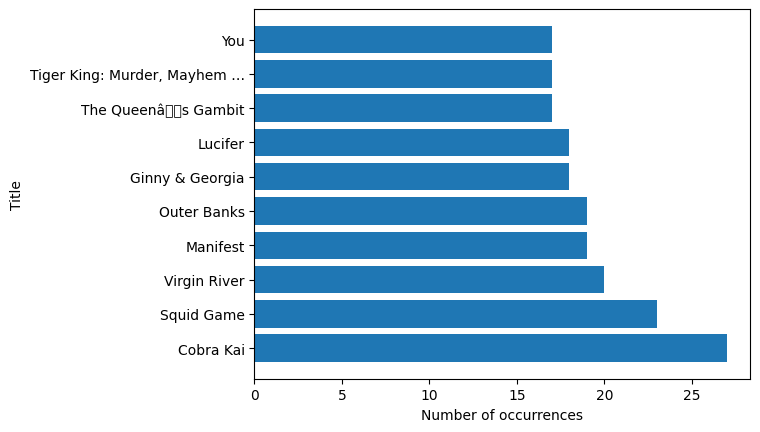

In [34]:
# Filter the rows where the 'Rank' column is equal to 1
filtered_df = df_netflix[df_netflix['Rank'] == 1]

# Count the number of occurrences for each title
title_counts = filtered_df['Title'].value_counts()[:10]

# Create a horizontal bar chart
plt.barh(y=title_counts.index, width=title_counts.values)

# Add labels to the axes
plt.xlabel(xlabel='Number of occurrences')
plt.ylabel(ylabel='Title')

# Show the plot
plt.show()

In [35]:
# list all Netiflix titles with its quantitites
df_netflix["Title"].value_counts()

Title
Cocomelon                       428
Ozark                            85
Cobra Kai                        81
Manifest                         80
The Queenâs Gambit             73
                               ... 
The Office                        1
Animals on the Loose: A You…      1
Dark                              1
The Secret Life of Pets 2         1
Step Up Revolution                1
Name: count, Length: 645, dtype: int64

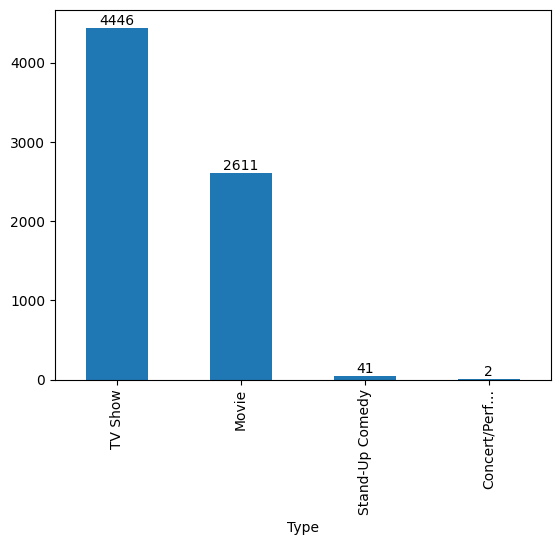

In [36]:
# plot netflix content types by quantity in bars

# create bar chart
ax_types = df_netflix['Type'].value_counts().plot(kind='bar')

# add values to each bar
for idx, value in enumerate(iterable=df_netflix['Type'].value_counts()):
    ax_types.text(x=idx, y=value, s=str(object=value), ha='center', va='bottom')

# show result
plt.show()

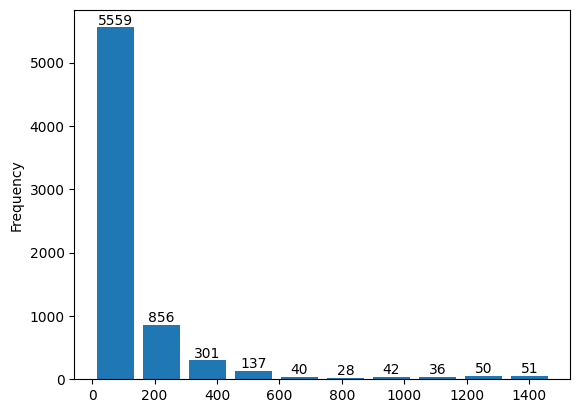

In [37]:
# plot histogram of Viewership Score values

# create histogram
ax_vs = df_netflix['Viewership Score'].plot(kind='hist', rwidth=0.8)

# add values to each bar
for patch in ax_vs.patches:
    height = patch.get_height()
    ax_vs.annotate(text=f'{int(height)}',
                   xy=(patch.get_x() + patch.get_width() / 2, height),
                   ha='center', va='bottom')

# show result
plt.show()

In [38]:
# show line with max Viewership Score
df_netflix[df_netflix['Viewership Score'] == df_netflix['Viewership Score'].max()]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
6998,2022-03-01,9,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",428,1474
